In [5]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")

# PRODUCE STATISTICS
# We will use these functions to run our circuit and visualize its final state
from qiskit import Aer, execute 
from qiskit.visualization import *

# Invoke a primitive. For more details see https://qiskit.org/documentation/partners/qiskit_ibm_runtime/tutorials.html
# result = Sampler("ibmq_qasm_simulator").run(circuits).result()

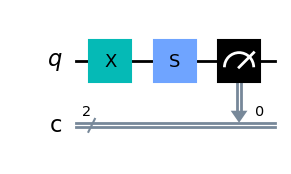

In [3]:
# Make a quantum circuit (QC) with 1 qubits and 2 bit, that
# qubit No. 0 has gate X, then a S gate
# qubit No. 0 measurement is stored in bit No. 0

# NOTE: number of bit that stores measurement is indicated as a small number
#       hovering over the classical bit pipe, 
#       right to the arrow starting from the measurement indication

qc = QuantumCircuit(1, 2)     
qc.x(0)                       
qc.s(0)
qc.measure(0,0)               #measure qubit No. 0 and store it in bit No. 0
qc.draw()                     

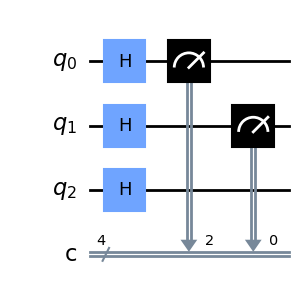

In [4]:
# Make a quantum circuit (QC) with 3 qubits and 4 bit, that
# all qubits have a gate H,
# qubit No.0  measurement is stored in bit No. 2
# qubit No.1  measurement is stored in bit No. 0

qc = QuantumCircuit(3, 4)     
qc.h(0)    
qc.h(1) 
qc.h(2) 
qc.measure(0,2)               #measure qubit No. 0 and store it in bit No. 2
qc.measure(1,0)               #measure qubit No. 1 and store it in bit No. 0
qc.draw()                     

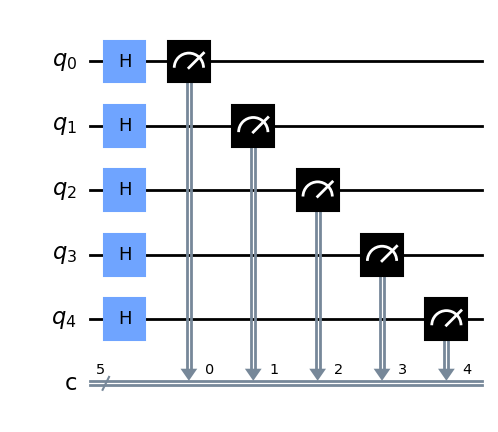

In [5]:
# Make a quantum circuit (QC) with 5 qubits and 5 bits, that
# all qubits have gate H, 
# all qubits' measurements are stored serially in the classical bits
# --> using the "measure(qubit, bit)" method for each measurement 
# Be sure to MAKE AN EFFICIENT CODE 

# NOTE: prefer using iterations and constants/ variables instead of specific numerical values
#       when applicable. 

qubits, bits = 5, 5

qc = QuantumCircuit(qubits, bits)      #variables for code efficiency 

for i in range(qubits):                #iteration for code efficiency 
    qc.h(i)

for i in range(bits):
    qc.measure(i, i)                   #stores measurement of a qubit on a specific bit

qc.draw()                    

In [9]:
# Make a quantum circuit (QC) with 3 qubits and 3 bits, that
# qubit No.2 has gate X, 
# all qubits are measured with ".measure(q, q)" in one-line-command
# store each qubit in whichever classcial bit you desire
# Be sure to MAKE AN EFFICIENT CODE

qubits, bits = 3, 3

qc = QuantumCircuit(qubits, bits)  
qc.x(2)
qc.measure([0, 1, 2], [1, 0, 2])      # the ".measure(q,q)" can take lists as parameters

qc.draw('text')

┌─┐      
q_0: ─────┤M├──────
          └╥┘┌─┐   
q_1: ──────╫─┤M├───
     ┌───┐ ║ └╥┘┌─┐
q_2: ┤ X ├─╫──╫─┤M├
     └───┘ ║  ║ └╥┘
c: 3/══════╩══╩══╩═
           1  0  2

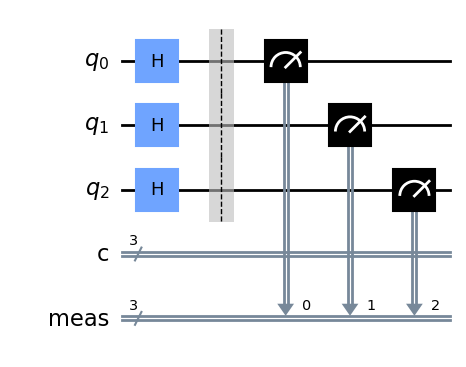

In [8]:
# Make a quantum circuit (QC) with 3 qubits and 3 bits, that
# all qubits have gate H, 
# all qubits are measured 
# --> using the "measure_all()" method to measure all qubits at one line of code

# NOTE: observe that "measure_all()" method creates a new pipe of bits, 
#       even though we already had some included.
#       Size of the pipe is excactyly the same as the number of qubits. 
#       Also, it adds a barrier by default. 

qubits, bits = 3, 3

qc = QuantumCircuit(qubits, bits)

for i in range(qubits):
    qc.h(i)

qc.measure_all()                 # creates a new pipe of bits to store measurement results
                                 # DO NOT mess up with the "c" pipe

qc.draw()                    

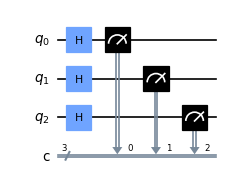

Experiment run 100 times

Show both measured value and how many times each was measured:
{'001': 11, '000': 10, '010': 9, '101': 19, '111': 12, '011': 8, '100': 14, '110': 17}


Show only the measured values (keys): 
 ['001', '000', '010', '101', '111', '011', '100', '110']


Show only how  many times each key was measured (values): 
 [11, 10, 9, 19, 12, 8, 14, 17]




In [5]:
N = 3
times_to_run_expirement = 100

qc = QuantumCircuit(N, N)
for i in range(N):
    qc.h(i)
lst = [ x for x in range(0,N)]
qc.measure(lst, lst)

display(qc.draw(scale=0.6))

print("Experiment run", times_to_run_expirement,"times", end="")
times_to_run_exp = times_to_run_expirement
simulation = Aer.get_backend('aer_simulator')
experiment = simulation.run(qc, shots=times_to_run_exp, memory=True)
result = experiment.result()
counts = result.get_counts(qc)  # Get the measurement outcomes
print("\n")

print("Show both measured value and how many times each was measured:")
print(counts)
print("\n")

measured_results = list(counts.keys())  # Extract only the measurement outcomes
print("Show only the measured values (keys): \n", measured_results)
print("\n")

times_measured = list(counts.values())  # Extract only the measurement outcomes
print("Show only how  many times each key was measured (values): \n", times_measured)
print("\n")


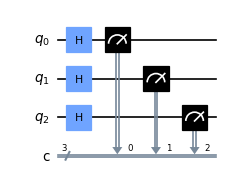

Experiment run 100 times

Show results (keys, values) using a for loop
->Outcome: 101, Frequency: 9
->Outcome: 010, Frequency: 9
->Outcome: 000, Frequency: 13
->Outcome: 110, Frequency: 13
->Outcome: 100, Frequency: 21
->Outcome: 011, Frequency: 13
->Outcome: 111, Frequency: 12
->Outcome: 001, Frequency: 10


Show SORTED by measurements (keys) results in form (keys, values) using a for loop
->Outcome: 000, Frequency: 13
->Outcome: 001, Frequency: 10
->Outcome: 010, Frequency: 9
->Outcome: 011, Frequency: 13
->Outcome: 100, Frequency: 21
->Outcome: 101, Frequency: 9
->Outcome: 110, Frequency: 13
->Outcome: 111, Frequency: 12


Show SORTED by times (value) results in form (keys, values) using a for loop
->Outcome: 101, Frequency: 9
->Outcome: 010, Frequency: 9
->Outcome: 001, Frequency: 10
->Outcome: 111, Frequency: 12
->Outcome: 000, Frequency: 13
->Outcome: 110, Frequency: 13
->Outcome: 011, Frequency: 13
->Outcome: 100, Frequency: 21




In [6]:
N = 3
times_to_run_expirement = 100

qc = QuantumCircuit(N, N)
for i in range(N):
    qc.h(i)
lst = [ x for x in range(0,N)]
qc.measure(lst, lst)

display(qc.draw(scale=0.6))

print("Experiment run", times_to_run_expirement,"times", end="")
times_to_run_exp = times_to_run_expirement
simulation = Aer.get_backend('aer_simulator')
experiment = simulation.run(qc, shots=times_to_run_exp, memory=True)
result = experiment.result()
counts = result.get_counts(qc)  # Get the measurement outcomes

print("\n")
print("Show results (keys, values) using a for loop")
for outcome, frequency in counts.items():
    print(f"->Outcome: {outcome}, Frequency: {frequency}")
print("\n")

counts_sorted_0 = sorted(counts.items(), key=lambda x: x[0])
print("Show SORTED by measurements (keys) results in form (keys, values) using a for loop")
for outcome, frequency in counts_sorted_0:
    print(f"->Outcome: {outcome}, Frequency: {frequency}")
print("\n")

counts_sorted_1 = sorted(counts.items(), key=lambda x: x[1])
print("Show SORTED by times (value) results in form (keys, values) using a for loop")
for outcome, frequency in counts_sorted_1:
    print(f"->Outcome: {outcome}, Frequency: {frequency}")
print("\n")

In [3]:
print("EXTRACT ON LIST THE MEASURED VALUES OF QUBIT")
print("for 1 measurement\n")

N = 3
times_to_run_expirement = 1

qc = QuantumCircuit(N, N)
for i in range(N):
    qc.h(i)
lst = [ x for x in range(0,N)]
qc.measure(lst, lst)

times_to_run_exp = times_to_run_expirement
simulation = Aer.get_backend('aer_simulator')
experiment = simulation.run(qc, shots=times_to_run_expirement, memory=True)
result = experiment.result()
counts = result.get_counts(qc)  # Get the measurement outcomes

print("from '", counts.keys(), "', we extract ")
ind_val = [int(char) for char in str(counts.keys()) if (char=='0' or char=='1')]
print("-> qubit values",ind_val)
print("\n")


EXTRACT ON LIST THE MEASURED VALUES OF QUBIT
for 1 measurement

from ' dict_keys(['011']) ', we extract 
-> qubit values [0, 1, 1]




In [4]:
print("EXTRACT ON LIST THE ~NUMBER~ OF MEASUREMENTS")
print("for N measurements\n")

N = 3
times_to_run_expirement = 500

qc = QuantumCircuit(N, N)
for i in range(N):
    qc.h(i)
lst = [ x for x in range(0,N)]
qc.measure(lst, lst)

times_to_run_exp = times_to_run_expirement
simulation = Aer.get_backend('aer_simulator')
experiment = simulation.run(qc, shots=times_to_run_expirement, memory=True)
result = experiment.result()
counts = result.get_counts(qc)  # Get the measurement outcomes


print("from '", counts.values(), "', we extract ")
ind_char = [char for char in str(counts.values())]
i, prev_is_dig, times = 0, False, list()
while i < len(ind_char)-1:
    if ind_char[i].isdigit():
        dig, prev_is_dig = str(ind_char[i]), True
        while prev_is_dig == True and i < len(ind_char)-1:
            if ind_char[i+1].isdigit():
                dig = dig + ind_char[i+1]
                i = i + 1
            else:
                i, prev_is_dig = i+1, False
        #print("dig found", dig)
        times.append(int(dig))
    else:
        i, prev_is_dig = i + 1, False
if prev_is_dig == True and ind_char[len(ind_char)-1].isdigit():
    dig = dig + ind_char[i]
    times.append(int(dig))
print("-> times:", times)

EXTRACT ON LIST THE ~NUMBER~ OF MEASUREMENTS
for N measurements

from ' dict_values([73, 77, 54, 58, 54, 71, 52, 61]) ', we extract 
-> times: [73, 77, 54, 58, 54, 71, 52, 61]


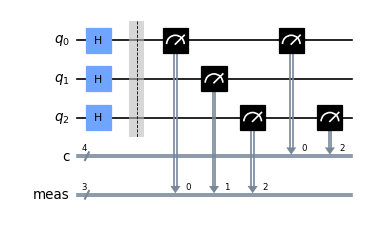

Measurement Results from measure_all():
{'100': 10, '000': 13, '111': 15, '001': 10, '101': 19, '110': 10, '011': 12, '010': 11}
Measurement Results from measurements on classical register 'c':
{'0100': 10, '0000': 11, '0101': 19, '0001': 12}


In [7]:
# Create the quantum circuit
qr = QuantumRegister(3, 'q')
cr = ClassicalRegister(4, 'c')
qc = QuantumCircuit(qr, cr)

qc.h(qr)

# Measure all qubits using the measure_all() function
qc.measure_all()

# Measure some individual qubits and store the results in the classical register 'c'
qc.measure(qr[0], cr[0])
qc.measure(qr[2], cr[2])

# Execute the circuit on the simulator
simulation = Aer.get_backend('qasm_simulator')
job = simulation.run(qc, shots=100)
result = job.result()


# Results appear on from 
# <MEASURE_ALL_RES><SPACE><CLASSICAL_PIPE>":"<NUM><SPACE><NUM>

# Retrieve the counts for the measurement results from 'measure_all()'
counts_measure_all = {k[:qc.num_qubits]: v for k, v in result.get_counts().items()}

# Retrieve the counts for measurements on the classical register 'c'
counts_c = {k[qc.num_qubits+1:]: v for k, v in result.get_counts().items()}

display(qc.draw(scale=0.6))
print("Measurement Results from measure_all():")
print(counts_measure_all)

print("Measurement Results from measurements on classical register 'c':")
print(counts_c)